In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import lib

In [6]:
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
#All the libralies used in this project
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures


## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
from xgboost import XGBRegressor


In [7]:
!pip install sklearn_features
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Get Data

In [8]:
df=pd.read_csv("/content/train.csv")
sample=pd.read_csv("/content/sample_submission.csv")
sample=pd.DataFrame(sample)
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


# Unique categorical data

In [9]:
df['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Fair', 'Ideal'], dtype=object)

In [10]:
df['color'].unique()

array(['E', 'I', 'J', 'F', 'H', 'D', 'G'], dtype=object)

In [11]:
df['clarity'].unique()

array(['SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'VS1', 'IF'],
      dtype=object)

# Data Inf

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [13]:
df.shape

(43040, 11)

# Check null date

In [14]:
missing=df.isnull().sum()
missing

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Data Describe

In [15]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.374606,-0.040978,-0.116833,-0.301711,-0.407353,-0.395176,-0.400306
carat,-0.374606,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,-0.040978,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,-0.116833,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,-0.301711,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,-0.407353,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,-0.395176,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,-0.400306,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


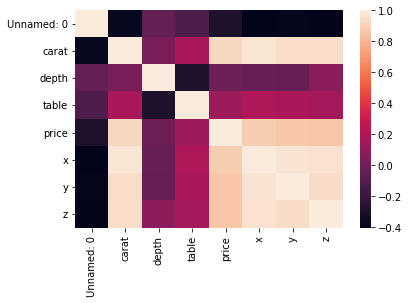

In [17]:
sns.heatmap(df.corr())

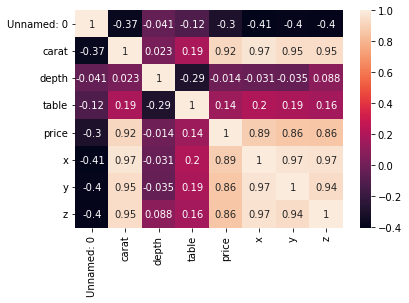

In [18]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


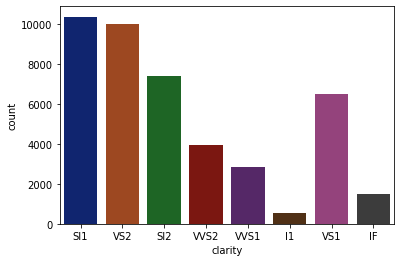

In [19]:
sns.countplot(df['clarity'],palette="dark")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


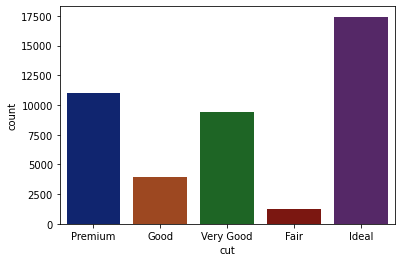

In [20]:
sns.countplot(df['cut'],palette="dark")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


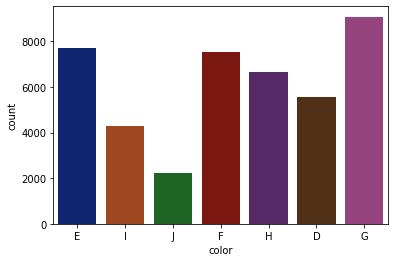

In [21]:
sns.countplot(df['color'],palette="dark")

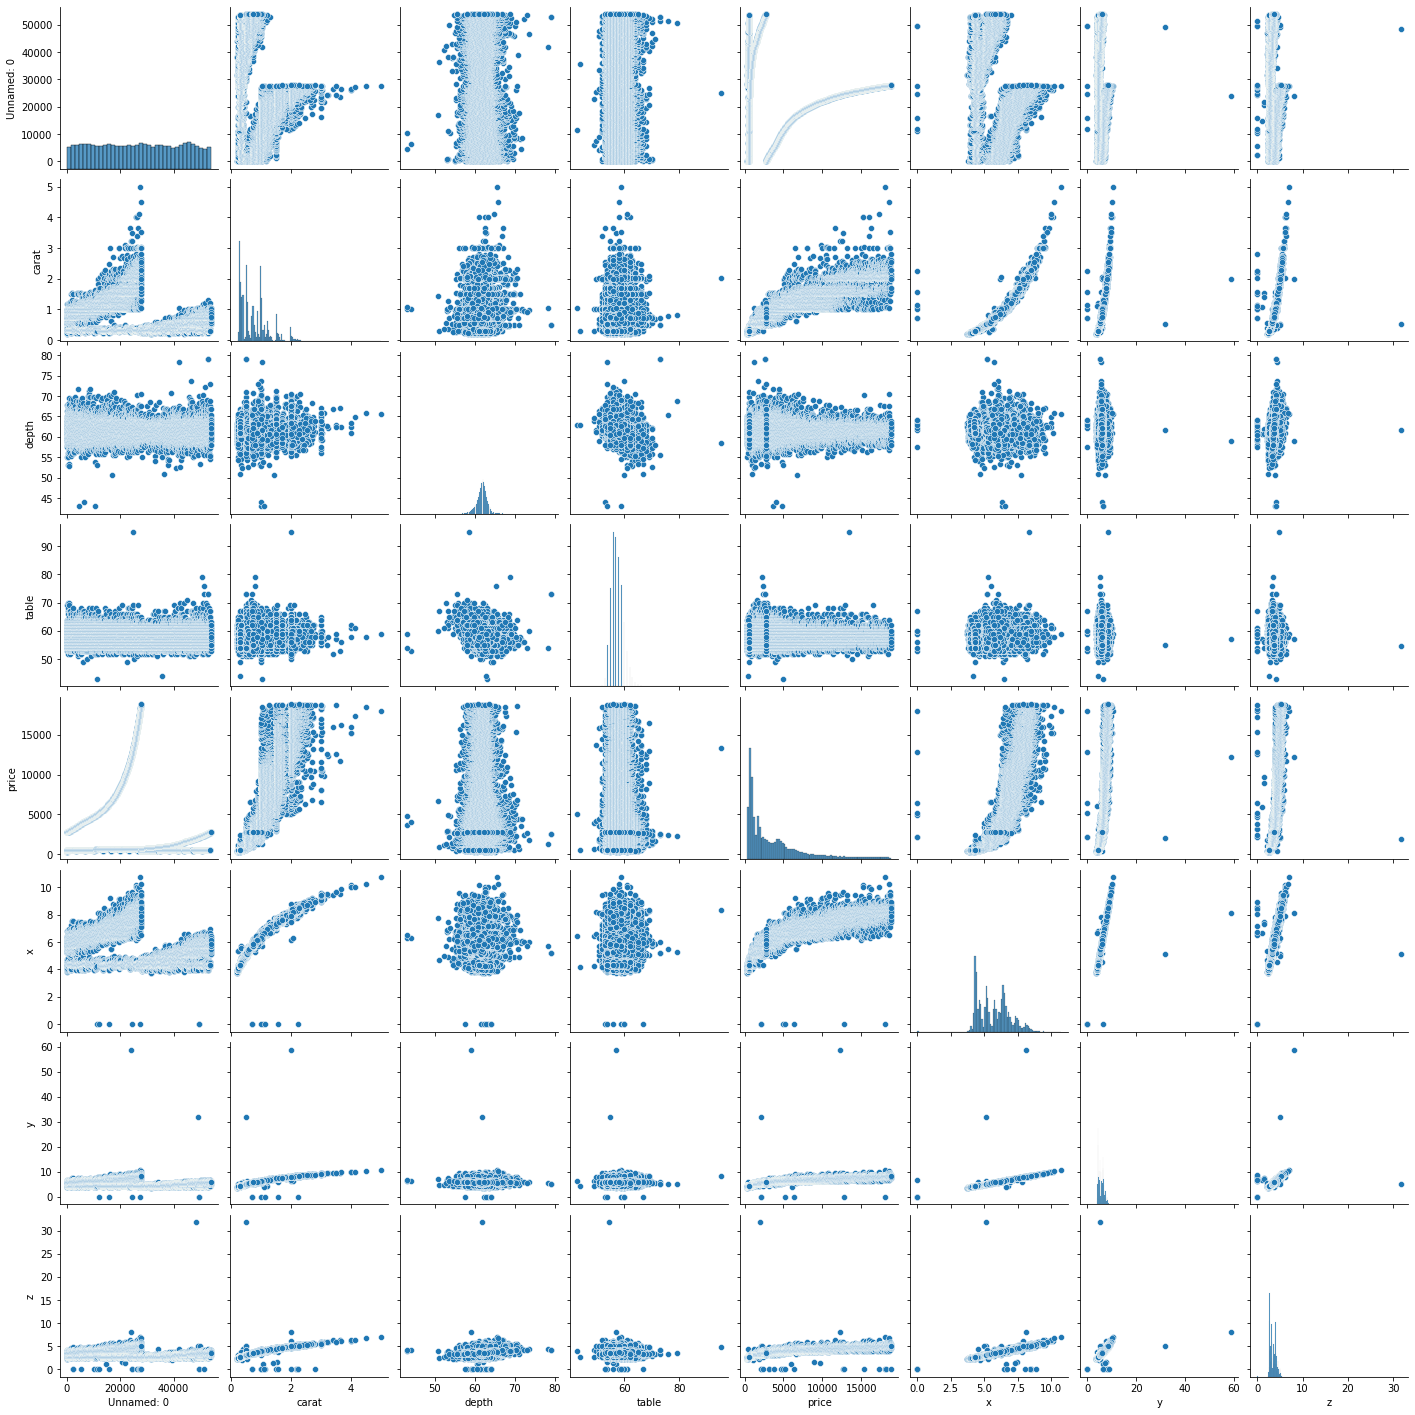

In [22]:
sns.pairplot(df)

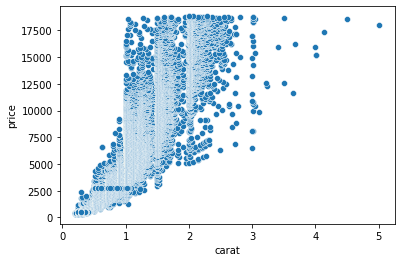

In [23]:
 sns.scatterplot(x=df["carat"], y = df["price"])


outliers at cart > 3

In [24]:
 df.drop(df[df["carat"]> 3].index, inplace=True)

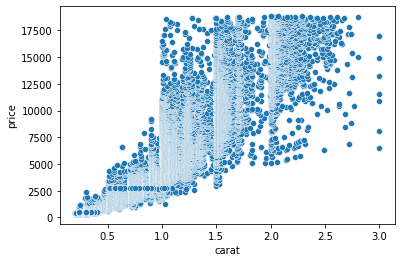

In [25]:
sns.scatterplot(x=df["carat"], y = df["price"])

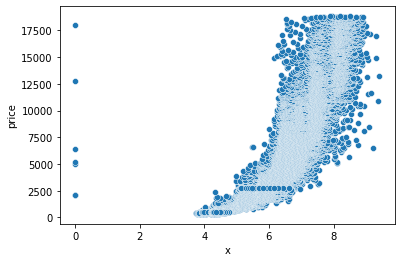

In [26]:
 sns.scatterplot(x=df["x"], y = df["price"])
      

outliers at x < 2

In [27]:
df.drop(df[df["x"]< 2].index, inplace=True)

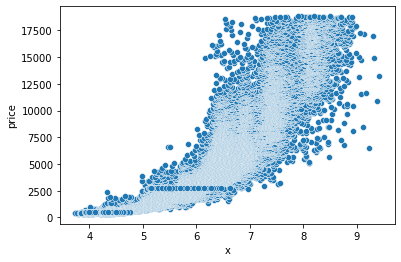

In [28]:
 sns.scatterplot(x=df["x"], y = df["price"])

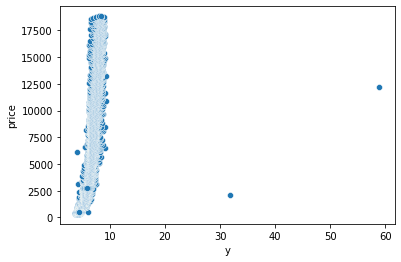

In [29]:
  sns.scatterplot(x=df["y"], y = df["price"])
        

outliers at y > 20

In [30]:
df.drop(df[df["y"]> 20].index, inplace=True)

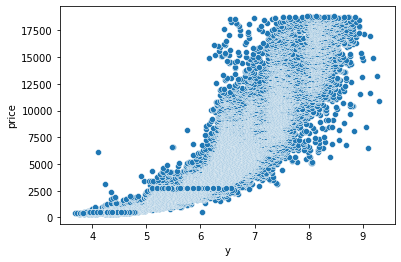

In [31]:
sns.scatterplot(x=df["y"], y = df["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


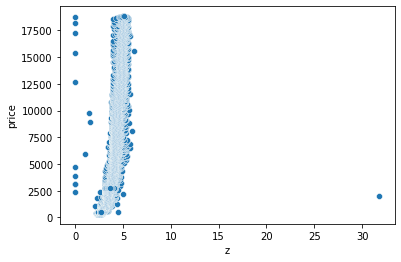

In [32]:
sns.scatterplot(df["z"], y = df["price"])
     

outliers at z > 30

In [33]:
# remove outliers
df.drop(df[df["z"]> 30].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


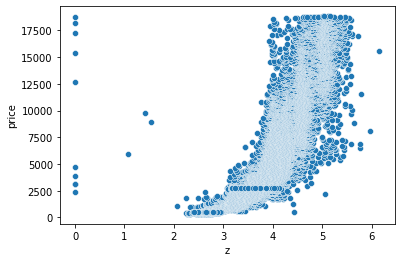

In [34]:
sns.scatterplot(df["z"], y = df["price"])

In [35]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


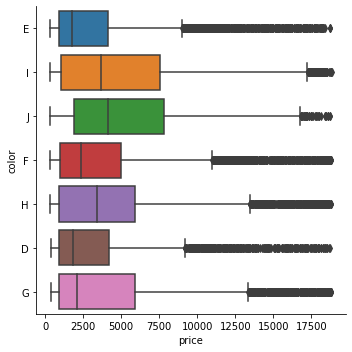

In [36]:
 sns.factorplot("price", "color", data=df, kind="box")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


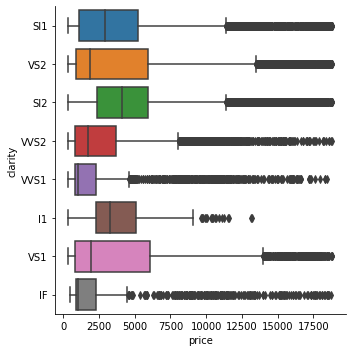

In [37]:
sns.factorplot("price", "clarity", data=df, kind="box")

In [38]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [39]:
#spliting our own testing data before using the given test data 
df=pd.read_csv("/content/train.csv")

y_train=df["price"]
x_train=df.drop(["price","Unnamed: 0"], axis=1, inplace=False)


from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
od=OrdinalEncoder()
transformer=OrdinalEncoder(categories=[['Fair','Good','Very Good','Premium','Ideal'],["J","I","H","G","F","E","D"],["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])

transformer.fit_transform(x_train[["cut","color","clarity"]])
column_trans = make_column_transformer(
    (transformer, ["cut","color","clarity"]),
    remainder='passthrough')
x_train=column_trans.fit_transform(x_train)
x_train

array([[3.  , 5.  , 2.  , ..., 3.89, 3.84, 2.31],
       [3.  , 1.  , 3.  , ..., 4.2 , 4.23, 2.63],
       [1.  , 0.  , 1.  , ..., 4.34, 4.35, 2.75],
       ...,
       [1.  , 6.  , 2.  , ..., 5.69, 5.75, 3.61],
       [3.  , 2.  , 1.  , ..., 6.15, 6.12, 3.74],
       [4.  , 6.  , 1.  , ..., 5.83, 5.87, 3.64]])

In [40]:
test=pd.read_csv("/content/test.csv")

first_col = list(test['Unnamed: 0'])
test=test.drop(["Unnamed: 0"], axis=1, inplace=False)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
od=OrdinalEncoder()
transformer=OrdinalEncoder(categories=[['Fair','Good','Very Good','Premium','Ideal'],["J","I","H","G","F","E","D"],["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])

transformer.fit_transform(test[["cut","color","clarity"]])
column_trans = make_column_transformer(
    (transformer, ["cut","color","clarity"]),
    remainder='passthrough')
test=column_trans.fit_transform(test)
test

array([[4.  , 5.  , 1.  , ..., 3.95, 3.98, 2.43],
       [1.  , 5.  , 4.  , ..., 4.05, 4.07, 2.31],
       [2.  , 2.  , 2.  , ..., 4.07, 4.11, 2.53],
       ...,
       [2.  , 5.  , 3.  , ..., 5.71, 5.76, 3.47],
       [2.  , 5.  , 3.  , ..., 5.69, 5.72, 3.49],
       [2.  , 6.  , 2.  , ..., 5.66, 5.68, 3.56]])

In [41]:
#linear regression model 
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
LinearRegression=LinearRegression()
LinearRegression.fit(x_train,y_train)

LinearRegression()

In [43]:

s=cross_val_score(LinearRegression,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
s= np.sqrt(-s)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(s) 

y_pred_test=LinearRegression.predict(test)
y_pred_test[1]

Scores: [1042.70673269 1339.76140552 2965.99130704 1011.84012824  760.2491241 ]
Mean: 1424.1097395185666
Standard deviation: 792.5476405124165


219.71111542634708

In [44]:
#DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor 
tree  = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [46]:
s=cross_val_score(tree,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
s= np.sqrt(-s)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(s)
y_pred_test=tree.predict(test)

y_pred_test[1]

Scores: [ 656.50935904  782.68026958 1026.69980306 1591.295707   3074.12255297
 1385.03094161  172.21964162  241.18638817  330.65203981  530.86515653]
Mean: 979.1261859396487
Standard deviation: 830.0943211601012


373.0

In [48]:

sample=pd.read_csv("/content/sample_submission.csv")
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
XGBR = XGBRegressor()

XGBR.fit(x_train, y_train)
s=cross_val_score(XGBR,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
s= np.sqrt(-s)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(s) 

pre_test=XGBR.predict(test)

y_pred_test[1]

[06:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:59:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:59:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Scores: [ 697.11516021 1536.29057378 3787.49581574  282.64742697  421.72583905]
Mean: 1345.0549631504448
Standard deviation: 1296.3919785135768


373.0

In [49]:
final_results=XGBR.predict(test)
sample["price"]=final_results

sample.to_csv('sample.csv',index = False)
sample

,Unnamed: 0,price
0,1,343.450531
1,3,701.445496
2,8,378.891815
3,10,412.550690
4,12,148.562408
...,...,...
10895,53922,2791.227051
10896,53923,3102.299561
10897,53933,2851.707764
10898,53934,2709.384033
